## Using Instruments to deal with Noncompliance:

Noncompliance and the utilization of instruments represent pivotal facets within the realm of statistical analysis, particularly in scenarios where individuals or subjects possess the autonomy to deviate from prescribed treatments or interventions. 

The presence of noncompliance, wherein individuals may choose not to adhere to assigned treatments, poses a significant challenge in accurately evaluating the true effects of interventions or treatments. In such cases, instrumental variables play a crucial role in addressing biases stemming from noncompliance, offering a methodological approach to navigate these complexities. 

This serves as a gateway into exploring the intricate interplay between noncompliance and instrumental variables, delving into their significance, challenges, and methodologies utilized in empirical research to disentangle treatment effects from compliance issues.


In [ ]:
# !sudo apt-get install graphviz

In [2]:
# !pip install toolz
# !pip install cycler
# !pip install linearmodels

In [2]:
from toolz.curried import *
import pandas as pd
import numpy as np
from scipy.special import expit
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from cycler import cycler

### Demonstrating NonCompliance and Instrumental variables

To represent noncompliance effectively, a Directed Acyclic Graph (DAG) provides a structured visual, as depicted in Figure 11-1. In this representation, Z signifies the treatment assignment (random in this context), X denotes the treatment, Y stands for the outcome, and U embodies hidden factors confounding the treatment choice and the outcome. Importantly, W functions as an instrument: a variable impacting the treatment in a nonconfounded manner and not influencing the outcome except through the treatment.

Let's consider an experiment where a bank successfully conducted an experiment involving 10,000 customers, randomly allocating the availability of the prime credit card (prime_eligible). 

Each customer was assigned a 50% chance of being eligible for the card and a 50% chance of being in the control group. However, it's important to note that the bank couldn't compel customers to choose the card, rendering this experiment susceptible to non-compliance issues.

Non-Compliance Analysis:

    * Directed Graph Visualization: Utilizes the graphviz library to create a directed graph illustrating relationships between variables related to non-compliance.
       
    * Statistical Analysis: Uses Ordinary Least Squares (OLS) regression from the statsmodels library to analyze relationships between different variables.
    
    * Summary Statistics: Computes means and summary statistics for the loaded data.


Noncompliance in a dag:

    Z is the treatment assignment (random in this case), T is the treatment, Y is the outcome, and U is  is hidden factors that confound the treatment choice and the outcome. 
    
     Z is what is called an instrument: a variable that impacts the treatment in a nonconfounded way and doesn’t impact the outcome, unless through the treatment.

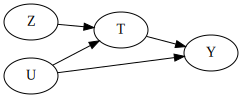

In [3]:
#non compliance

color=['0.0', '0.4', '0.8']
default_cycler = (cycler(color=color))
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']
plt.rc('axes', prop_cycle=default_cycler)

# Non-Compliance
from graphviz import Digraph
gr = Digraph(format="png", graph_attr={"rankdir":"LR"})
gr.edge("U", "T")
gr.edge("U", "Y")
gr.edge("Z", "T")
gr.edge("T", "Y")
gr

In [13]:
df = pd.read_csv("./data/prime_card.csv")
df.head(20)

,age,income,credit_score,prime_elegible,prime_card,pv,tau,categ
0,37.7,9687.0,822.0,0,0,4913.79,700.0,complier
1,46.0,13731.0,190.0,0,0,5637.66,200.0,never-taker
2,43.1,2839.0,214.0,1,1,2410.45,700.0,complier
3,36.0,1206.0,318.0,1,1,1363.06,700.0,complier
4,39.7,4095.0,430.0,0,0,2189.80,700.0,complier
5,48.6,3548.0,99.0,0,0,1646.16,200.0,never-taker
6,32.3,3771.0,126.0,1,0,2288.43,200.0,never-taker
7,40.3,10786.0,221.0,1,0,4972.09,200.0,never-taker
8,47.1,1435.0,315.0,1,1,1454.60,700.0,complier
9,38.5,2187.0,768.0,1,1,2908.24,700.0,complier


Mapping these variables to the dag above, the purchase volume corresponds to Y, the availability of the prime credit card aligns with Z, and possessing the prime card corresponds to T. 

The bank also possesses information concerning the customer's age, income, and credit score. We also have the true effect of the prime card on PV, denoted as t(tau), and the customer's group classification. 

Showcasing how different independent variables ('prime_elegible' and 'prime_card') relate to the dependent variable ('pv') and how these relationships can be assessed using statistical modeling techniques like OLS regression.

In [14]:
# Extending Potential Outcomes
m = smf.ols("pv~prime_elegible", data=df).fit()
m.summary().tables[1]

df["tau"].mean()

m = smf.ols("pv~prime_card", data=df).fit()
m.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2534.4947,19.239,131.740,0.000,2496.783,2572.206
prime_card,588.1388,41.676,14.112,0.000,506.446,669.831


1) Instrument Identification Assumptions:
    
* Analyzes assumptions related to instrumental variables and their identification in econometric models.

* Demonstrates first stage, reduced form, and two-stage least squares regression models.

       - Summary statistics (coefficients, standard errors, etc.) from these regression models help assess the validity and reliability of instrumental variables. Interpretation involves examining the strength of instruments and the impact on endogenous variables.

* Calculates standard errors, confidence intervals, and other statistics related to instrumental variable estimation.

        - The calculated standard errors and confidence intervals help assess the precision of estimates derived from instrumental variable estimation. A narrower interval implies more precise estimates.

           

In [15]:
# Instrument Identification Assumptions
# First Stage
first_stage = smf.ols("prime_card ~ prime_elegible", data=df).fit()
first_stage.summary().tables[1]

df.groupby("categ").size()/len(df)


categ
complier       0.4269
never-taker    0.5731
dtype: float64

In [16]:
# Reduced Form
red_form = smf.ols("pv ~ prime_elegible", data=df).fit()
red_form.summary().tables[1]

late = (red_form.params["prime_elegible"] /
        first_stage.params["prime_elegible"])
late

df.groupby("categ")["tau"].mean()

categ
complier       700.0
never-taker    200.0
Name: tau, dtype: float64

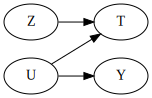

In [18]:
# Two Stage Least Squares
gr = Digraph(format="png", graph_attr={"rankdir":"LR"})
gr.edge("U", "T")
gr.edge("U", "Y")
gr.edge("Z", "T")
gr

In [19]:
iv_regr = smf.ols(
    "pv ~ prime_card",
    data=df.assign(prime_card=first_stage.fittedvalues)).fit()
iv_regr.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2498.3618,24.327,102.701,0.000,2450.677,2546.047
prime_card,757.6974,80.914,9.364,0.000,599.091,916.304


In [20]:
Z = df["prime_elegible"]
T = df["prime_card"]
n = len(df)

e_iv = df["pv"] - iv_regr.predict(df)
compliance = np.cov(T, Z)[0, 1]/Z.var()

se = np.std(e_iv)/(compliance*np.std(Z)*np.sqrt(n))

print("SE IV:", se)
print("95% CI:", [late - 2*se, late + 2*se])

SE IV: 80.52861026141971
95% CI: [596.6401590115468, 918.7546000572256]


2) Additional Controls and Instruments: 

    * Extends analysis to incorporate additional control variables and instruments in the regression model.
    
    * Demonstrates the use of multiple instruments and control variables in a structural equation.
    

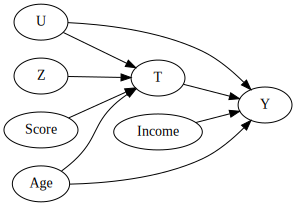

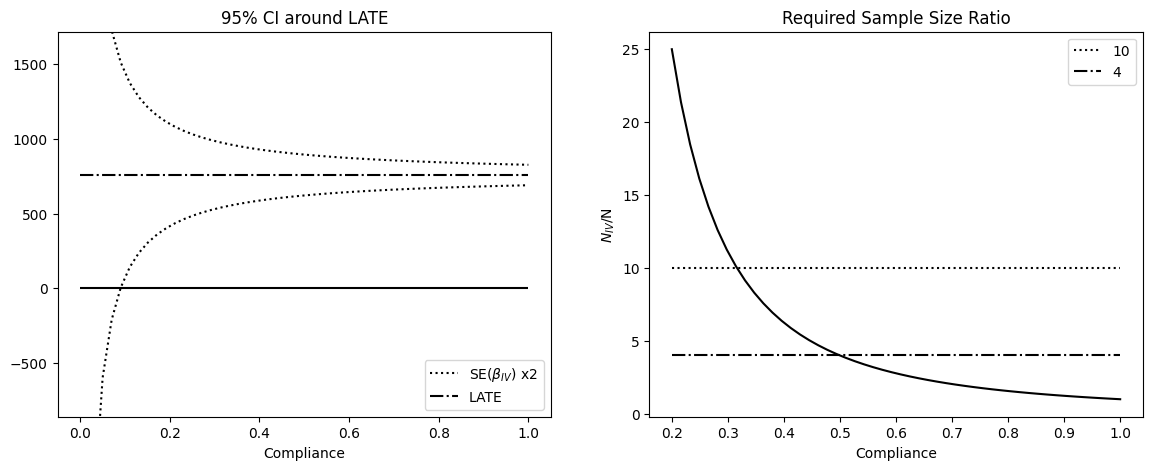

In [6]:
from linearmodels import IV2SLS

formula = 'pv ~ 1 + [prime_card ~ prime_elegible]'
iv_model = IV2SLS.from_formula(formula, df).fit(cov_type="unadjusted")
iv_model.summary.tables[1]

se_formula_iv = lambda compliance: np.std(e_iv)/(compliance*np.std(Z)*np.sqrt(n))
x = np.linspace(0.01, 1, 50)

effect = iv_regr.params["prime_card"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(x, effect-se_formula_iv(x)*2, label="SE($\\beta_{IV}$) x2", ls=":", color="0")
ax1.plot(x, effect+se_formula_iv(x)*2, ls=":", color="0")
ax1.hlines(effect, 0, 1, ls="-.", label="LATE")
ax1.hlines(0, 0, 1)
ax1.set_xlabel("Compliance")
ax1.set_ylim(-(effect+100), (effect+100)*2)
ax1.legend(loc="lower right")
ax1.set_title("95% CI around LATE")

x = np.linspace(0.2, 1, 50)
ax2.plot(x, 1/(x**2))
ax2.hlines(10, 0.2, 1, ls=":", label="10")
ax2.hlines(4, 0.2, 1, ls="-.", label="4")
ax2.set_xlabel("Compliance")
ax2.set_ylabel("$N_{IV}$/N")
ax2.set_title("Required Sample Size Ratio")
ax2.legend()

# Additional Controls and Instruments
gr = Digraph(format="png", graph_attr={"rankdir":"LR"})
gr.edge("U", "T")
gr.edge("U", "Y")
gr.edge("Z", "T")
gr.edge("T", "Y")
gr.edge("Income", "Y")
gr.edge("Age", "T")
gr.edge("Age", "Y")
gr.edge("Score", "T")
gr



Income demonstrates a high predictive capability for the outcome variable, yet it doesn't forecast compliance. Conversely, the credit score is indicative of compliance but doesn't predict the outcome. Age, however, acts as a confounding factor by predicting both the outcome and compliance. Leveraging these variables strategically can lead to a reduction in standard error when all are incorporated.

Specifically focusing on the credit score, it serves as a cause for compliance while not directly influencing the outcome variable. Consequently, it can be treated as an additional instrumental variable. Examining the Directed Acyclic Graph (DAG) reveals that the credit score satisfies the first three assumptions required for an instrumental variable, much like the existing instrumental variable. By introducing this variable as an extra IV in the Two-Stage Least Squares (2SLS) model, a noticeable decrease in the standard error of the Local Average Treatment Effect (LATE) parameter can be achieved.

The above plot contrasts the confidence interval's magnitude for our LATE parameter estimate, considering diverse estimated compliance rates (depicted in the first image). Additionally, it illustrates the increased sample size requirement for a test in scenarios involving noncompliance.

Even at a fifty percent compliance rate, the volume remains considerable. However, in numerous scenarios, only a small fraction of customers opt for the prime service or product. This significantly compounds the challenge of estimating the LATE. For example, if compliance dwindles to as low as 30%, the necessary sample size would escalate to ten times larger than that needed if compliance were not a concern. Obtaining such an extensive sample size tends to be impractical, if not unattainable. Nevertheless, encountering such an issue doesn't render all efforts futile. There are still strategies available to reduce the IV standard error, albeit involving the inclusion of additional covariates in our analysis.

In [21]:
formula = 'pv ~ 1 + [prime_card ~ prime_elegible + credit_score]'
iv_model = IV2SLS.from_formula(formula, df).fit()
iv_model.summary.tables[1]

formula = '''pv ~ 1 
+ [prime_card ~ prime_elegible + credit_score]
+ income + age'''

iv_model = IV2SLS.from_formula(formula, df).fit(cov_type="unadjusted")
iv_model.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,210.62,37.605,5.6008,0.0000,136.91,284.32
income,0.3998,0.0008,471.04,0.0000,0.3981,0.4014
age,9.7444,0.8873,10.982,0.0000,8.0053,11.483
prime_card,693.12,12.165,56.978,0.0000,669.28,716.96


In [22]:
# 2SLS by Hand
formula_1st = "prime_card ~ prime_elegible + credit_score + income+age"
first_stage = smf.ols(formula_1st, data=df).fit()

iv_model = smf.ols(
    "pv ~ prime_card + income + age",
    data=df.assign(prime_card=first_stage.fittedvalues)).fit()

iv_model.summary().tables[1]



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,210.6177,40.832,5.158,0.000,130.578,290.657
prime_card,693.1207,13.209,52.474,0.000,667.229,719.013
income,0.3998,0.001,433.806,0.000,0.398,0.402
age,9.7444,0.963,10.114,0.000,7.856,11.633


In [23]:
# Matrix Implementation
Z = df[["prime_elegible", "credit_score", "income", "age"]].values
X = df[["prime_card", "income", "age"]].values
Y = df[["pv"]].values

def add_intercept(x):
    return np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

Z_ = add_intercept(Z)
X_ = add_intercept(X)

X_hat = Z_.dot(np.linalg.inv(Z_.T.dot(Z_)).dot(Z_.T).dot(X_))

b_iv = np.linalg.inv(X_hat.T.dot(X_hat)).dot(X_hat.T).dot(Y)
b_iv[1]

e_hat_iv = (Y - X_.dot(b_iv))

var = e_hat_iv.var()*np.diag(np.linalg.inv(X_hat.T.dot(X_hat)))

np.sqrt(var[1])

t_tilde = smf.ols("prime_card ~ income + age", data=df).fit().resid

e_hat_iv.std()/(t_tilde.std()*np.sqrt(n*first_stage.rsquared))

12.156252763191322

3) Discontinuity Design

    * Examines the Discontinuity Design approach in econometrics, analyzing the impact around a specific threshold in the data.
    
    * Performs regression analysis on data concerning a discontinuity point and calculates related statistics.

In [29]:
# Discontinuity Design
df_dd = pd.read_csv("./data/prime_card_discontinuity.csv")
df_dd.head()

,balance,prime_card,pv,tau,categ
0,12100.0,1,356.472,300.0,always-takers
1,4400.0,1,268.172,300.0,always-takers
2,4600.0,1,668.896,300.0,always-takers
3,3500.0,1,428.094,300.0,always-takers
4,12700.0,1,1619.793,700.0,complier


In [24]:
m = smf.ols(f"pv~balance*I(balance>5000)", df_dd).fit()
m.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,251.1350,19.632,12.792,0.000,212.655,289.615
I(balance > 5000)[T.True],354.7539,22.992,15.430,0.000,309.688,399.820
balance,0.0616,0.005,11.892,0.000,0.051,0.072
balance:I(balance > 5000)[T.True],-0.0187,0.005,-3.488,0.000,-0.029,-0.008


Essentially, the process involves running two separate regression lines

    —one for observations above a specific threshold and another for those below it. 
    
    Even if compliance were perfect, meaning all observations above the threshold received treatment and all below it received control, this methodology could still be applicable. In this hypothetical scenario with perfect compliance, the ITTE (Intention to Treat Effect) would align precisely with the ATE (Average Treatment Effect).

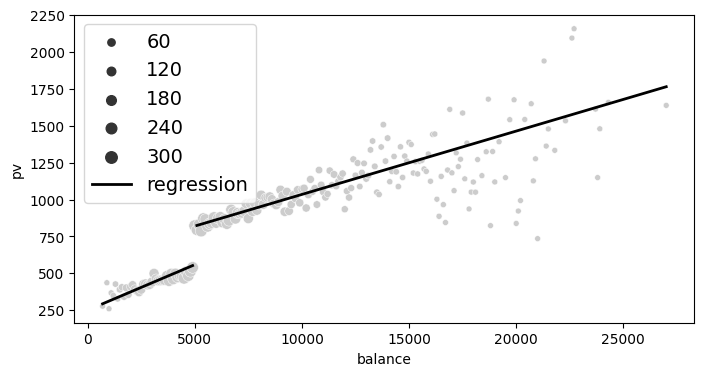

In [30]:
plt_df = df_dd.round({"balance": -2}).assign(size=1).groupby("balance").agg({"pv":"mean", "size": "sum"}).reset_index()

plt.figure(figsize=(8,4))
sns.scatterplot(data=plt_df, y="pv", x="balance", size="size", color="C5")
plt.plot(plt_df.query("balance<5000")["balance"], m.predict(plt_df.query("balance<5000")), color="C0", lw=2, label="regression")
plt.plot(plt_df.query("balance>5000")["balance"], m.predict(plt_df.query("balance>5000")), color="C0", lw=2)
plt.legend(fontsize=14)

In [27]:
plt_df = df_dd.round({"balance": -2})
pd.DataFrame(plt_df).head(50)

,balance,prime_card,pv,tau,categ
0,12100.0,1,356.472,300.0,always-takers
1,4400.0,1,268.172,300.0,always-takers
2,4600.0,1,668.896,300.0,always-takers
3,3500.0,1,428.094,300.0,always-takers
4,12700.0,1,1619.793,700.0,complier
5,4100.0,1,314.953,300.0,always-takers
6,11400.0,1,743.450,300.0,always-takers
7,2000.0,0,665.683,700.0,complier
8,9900.0,1,1065.934,300.0,always-takers
9,3400.0,0,1020.139,200.0,never-taker


As compliance isn't perfect, it becomes necessary to divide the intention-to-treat effect by the compliance rate. 

Within a discontinuity design framework, this signifies the shift in treatment probability upon crossing the 
threshold. To gauge this value, the prior procedure can be reiterated, substituting the outcome variable, 'pv', with the treatment variable, 'prime_card'. 

A straightforward function is provided below to calculate the IV estimate in a discontinuity design. It computes both the ITTE and the compliance rate, then divides one by the other.

In [31]:
def calculate_rdd_iv(data, dependent_var, treatment_var, regressor_var, threshold):
    compliance_model = smf.ols(f"{treatment_var}~{regressor_var}*I({regressor_var}>{threshold})", data).fit()
    itte_model = smf.ols(f"{dependent_var}~{regressor_var}*I({regressor_var}>{threshold})", data).fit()
    
    param_name = f"I({regressor_var} > {threshold})[T.True]"
    return itte_model.params[param_name] / compliance_model.params[param_name]

calculate_rdd_iv(df_dd, dependent_var="pv", treatment_var="prime_card", regressor_var="balance", threshold=10000)


654.3917626767734

Applying this function to our data yields an estimate that is close to the true LATE. 

Note: this dataset contains the individual level treatment effect stored in the tau column and the compliance category

Closing thoughts:

The overall exploration delved into the utilization of instruments to tackle noncompliance. An instrument is a variable that influences the treatment in an unconfounded manner and does not affect the outcome unless through the treatment itself.

Moreover, under the assumption that the instrument unilaterally alters the treatment, it becomes feasible to identify the average treatment effect on the compliers. This involves normalizing the intention-to-treat effect by the compliance rate, both of which are readily identifiable if the instrument is randomized.

However, a trade-off exists in terms of variance. When compliance is low, the instrumental variable estimate's variance significantly surpasses that of OLS. Specifically, if compliance stands at 50%, four times more samples would be required to achieve equivalent standard errors compared to a scenario with perfect compliance (100%).

To mitigate this increased variance, alternative strategies can be employed, with identifying variables adept at predicting the outcome being a promising approach, similar to the principles observed in OLS.

Additionally, you've discovered that discontinuities in your dataset can serve as instruments. While experiments are commonly deployed in industries, leveraging discontinuities can serve as an alternative method to determine the local average treatment effect when experimental data is unavailable.

### Worked Example 2:  Lalonde:  Propensity Score Matching
    
    Let's performs propensity score matching by finding the nearest control sample for each treated sample based on their propensity scores. 
    Then, Let's combines the matched treated and control samples for further analysis or modeling. Finally, let's assesses the balance between the treatment and control groups and performs an evaluation using classification metricss.  


The Lalonde dataset, focuses on estimating the impact of a job training program on individuals' earnings. It comprises data from a social experiment conducted in the 1970s. The treatment group received job training, while the control group did not.

**Assesses the balance between the treatment and control groups**

In [3]:
# !pip install rdd
# !pip install causalinference

In [10]:
# import rdd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from causalinference import CausalModel
from sklearn.model_selection import StratifiedKFold

In [ ]:
# !conda install -c conda-forge causalnex


In [26]:
data = pd.read_csv('data/lalonde.csv')
data

,Unnamed: 0,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,5,1,33,8,1,0,0,1,0.0,0.0,289.7899
...,...,...,...,...,...,...,...,...,...,...,...
609,610,0,18,11,0,0,0,1,0.0,0.0,10150.5000
610,611,0,24,1,0,1,1,1,0.0,0.0,19464.6100
611,612,0,21,18,0,0,0,0,0.0,0.0,0.0000
612,613,0,32,5,1,0,1,1,0.0,0.0,187.6713


In [27]:
# Extract features and target variable
X = pd.DataFrame(data)
y = pd.Series(data['treat'])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model to estimate the propensity scores
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predict propensity scores for the test set
propensity_scores = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Add propensity scores to the test set
X_test['propensity_score'] = propensity_scores

# Nearest Neighbor matching on propensity scores
treated = X_test[X_test['treat'] == 1]
control = X_test[X_test['treat'] == 0]

# For each treated sample, find the nearest control sample using propensity scores
matched_indices = []
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control['propensity_score'].values.reshape(-1, 1))

for _, treated_sample in treated.iterrows():
    treated_propensity = treated_sample['propensity_score']
    matched_index = nn.kneighbors([[treated_propensity]])[1][0][0]
    matched_indices.append(control.iloc[matched_index].name)

matched_control = control.loc[matched_indices]

# Combine matched treated and control samples
matched_data = treated.append(matched_control)

# Assess the balance between treatment and control groups
print("Balance Check - Mean of Propensity Scores:")
print("Treated group:", treated['propensity_score'].mean())
print("Matched control group:", matched_control['propensity_score'].mean())

# Evaluate the matched data using classification metrics or other relevant measures
y_matched = matched_data['treat']
X_matched = matched_data.drop(columns=['treat', 'propensity_score'])


Balance Check - Mean of Propensity Scores:
Treated group: 0.9888984593117586
Matched control group: 0.03570914397602399


/tmp/ipykernel_31538/1292630621.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matched_data = treated.append(matched_control)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error

# Causal model: Logistic Regression
causal_model = LogisticRegression(max_iter=200)

# Prepare data for the causal model
y_matched = matched_data['treat']
X_matched = matched_data.drop(columns=['treat', 'propensity_score'])

# Splitting the data into train and test sets
X_matched_train, X_matched_test, y_matched_train, y_matched_test = train_test_split(X_matched, y_matched, test_size=0.35, random_state=42)

# Train the causal inference model
causal_model.fit(X_matched_train, y_matched_train)

# Predict treatment outcome using the causal model
y_pred = causal_model.predict(X_matched_test)

# Evaluate the causal model using classification report and mean squared error
print("Classification Report:")
print(classification_report(y_matched_test, y_pred))

print("Mean Squared Error:", mean_squared_error(y_matched_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.88      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

Mean Squared Error: 0.06666666666666667


Propensity Score Estimation: The logistic regression model estimates the likelihood of an individual receiving treatment based on observed covariates. This propensity score helps balance the treatment and control groups, reducing bias in observational studies by matching treated and control samples with similar propensity scores.

Propensity Score Matching: Nearest Neighbor matching is used to pair each treated sample with the most similar control sample based on their propensity scores. This process creates a balanced dataset by ensuring similarity between the treated and control groups in terms of the propensity to receive treatment.

Causal Inference Model: In this example, a logistic regression model is used as an illustrative causal inference model. This model uses the matched data (combined treated and matched control samples) to predict treatment outcomes based on features. The evaluation metrics (classification report and MSE) assess how well this model predicts treatment outcomes on the matched dataset.

Interpretation involves examining the model's performance metrics (classification report, MSE) to understand how accurately the model predicts treatment outcomes on the matched data and assesses the effectiveness of the causal inference methodology employed in this example. It's important to consider the limitations and assumptions of the approach when interpreting the results and drawing conclusions about causality.

### References:

    
* [The Book of Why](http://repo.darmajaya.ac.id/4847/1/The%20book%20of%20why_%20the%20new%20science%20of%20cause%20and%20effect%20%28%20PDFDrive%20%29.pdf)

            
* [Netflix Engineering Blog](https://netflixtechblog.com/causal-machine-learning-for-creative-insights-4b0ce22a8a96)
            

* [Brady Neal's Causal Inference](https://www.bradyneal.com/causal-inference-course)
        

* [Matt Mestan Causal Inference Bootcamp](https://mattmasten.github.io/bootcamp/)


* [Causal Inference Mixtape](https://mixtape.scunning.com/07-instrumental_variables)

********************************************************************************************************************
    MIT License

    Copyright (c) 2023 Sai Sumana Puppala

    Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    
********************************************************************************************************************